In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch_12 데이터 시각화</font>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), forlium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리, 판다스내부에 포함
    * seaborn : matplotlib 기반으로 다양한 색, 테마, 챠트 기능과 group by 기능 포함된 라이브러리
# 1절 matplotlib


In [3]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정/


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
# 한글설정

# 경고를 인위적으로 안보이게


## 1.2 그래프 그리기
- matplotlib 으로 그래프 그리기 위한 단계
    1. 그래프 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장
    

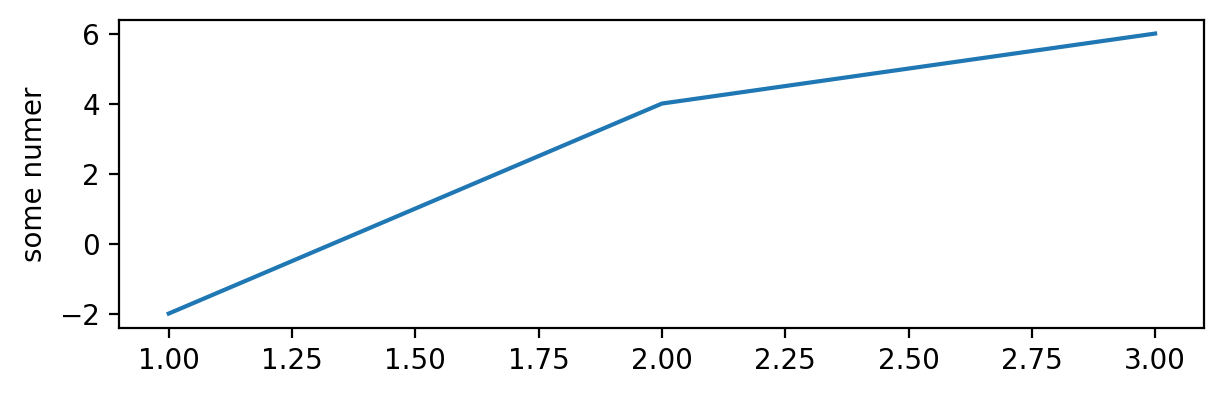

In [11]:
x = [1,2,3] # 1)데이터 준비
y = [-2,4,6] 
plt.figure(figsize=(7,2)) #2) 그래프 객체 생성
plt.plot(x, y)   #3) 그래프 함수
plt.ylabel('some numer') #4) 커스터마이징
plt.show()   #5) 그래프 화면 출력 cf)plt.savefig('파일명,jpg')

## 1.3그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [13]:
import numpy as np
x = np.arange(0, 10, 0.01)
len(x)

1000

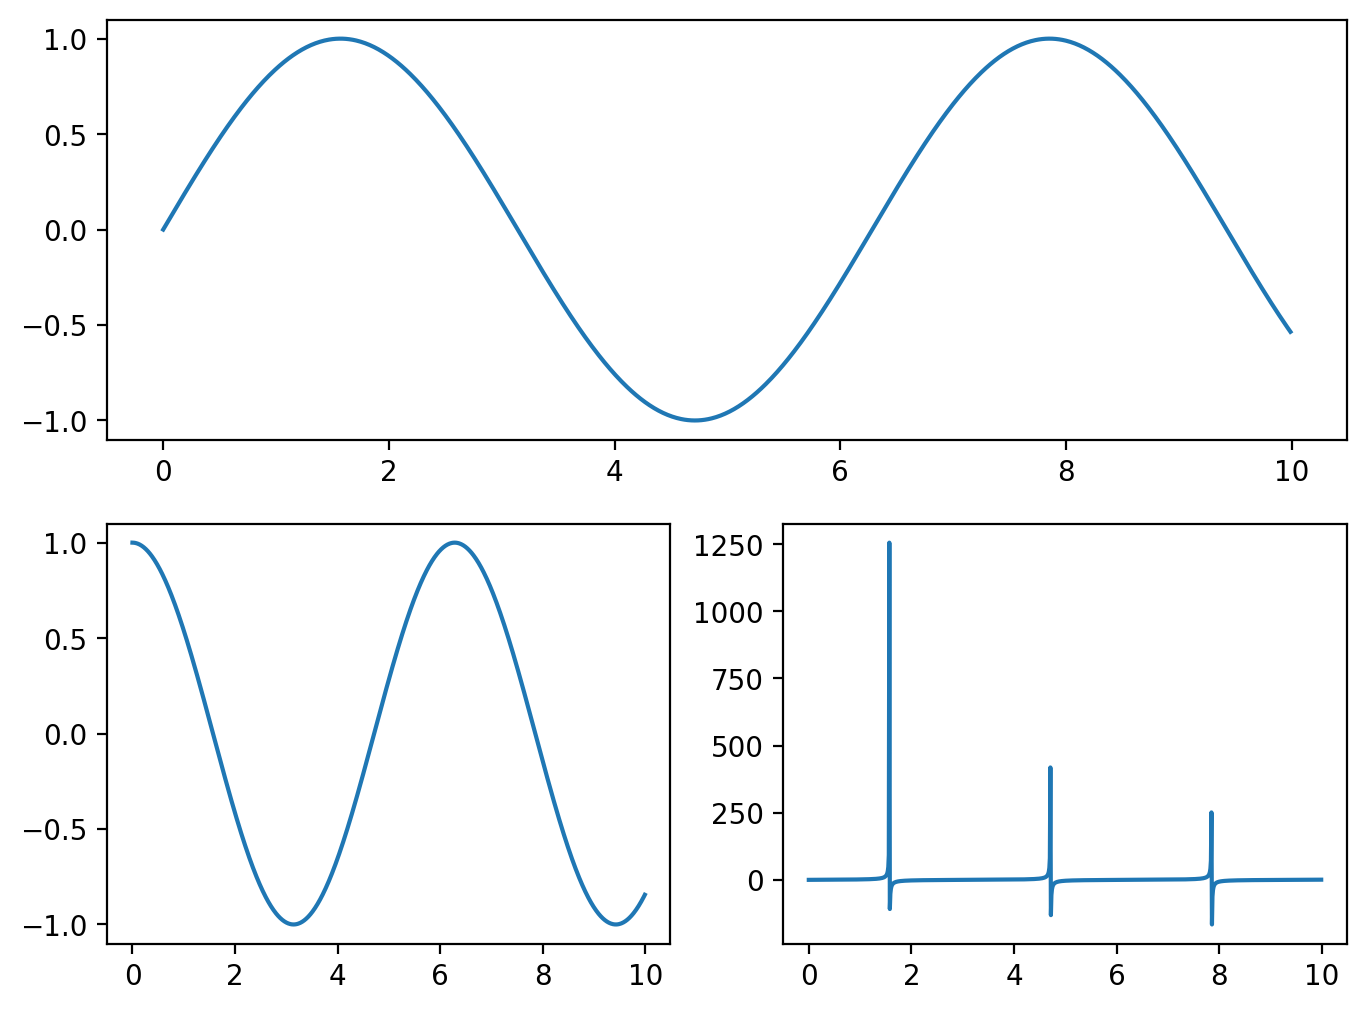

In [19]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.tan(x))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10704\1698453716.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2); plt.plot(x, np.cos(x))


TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

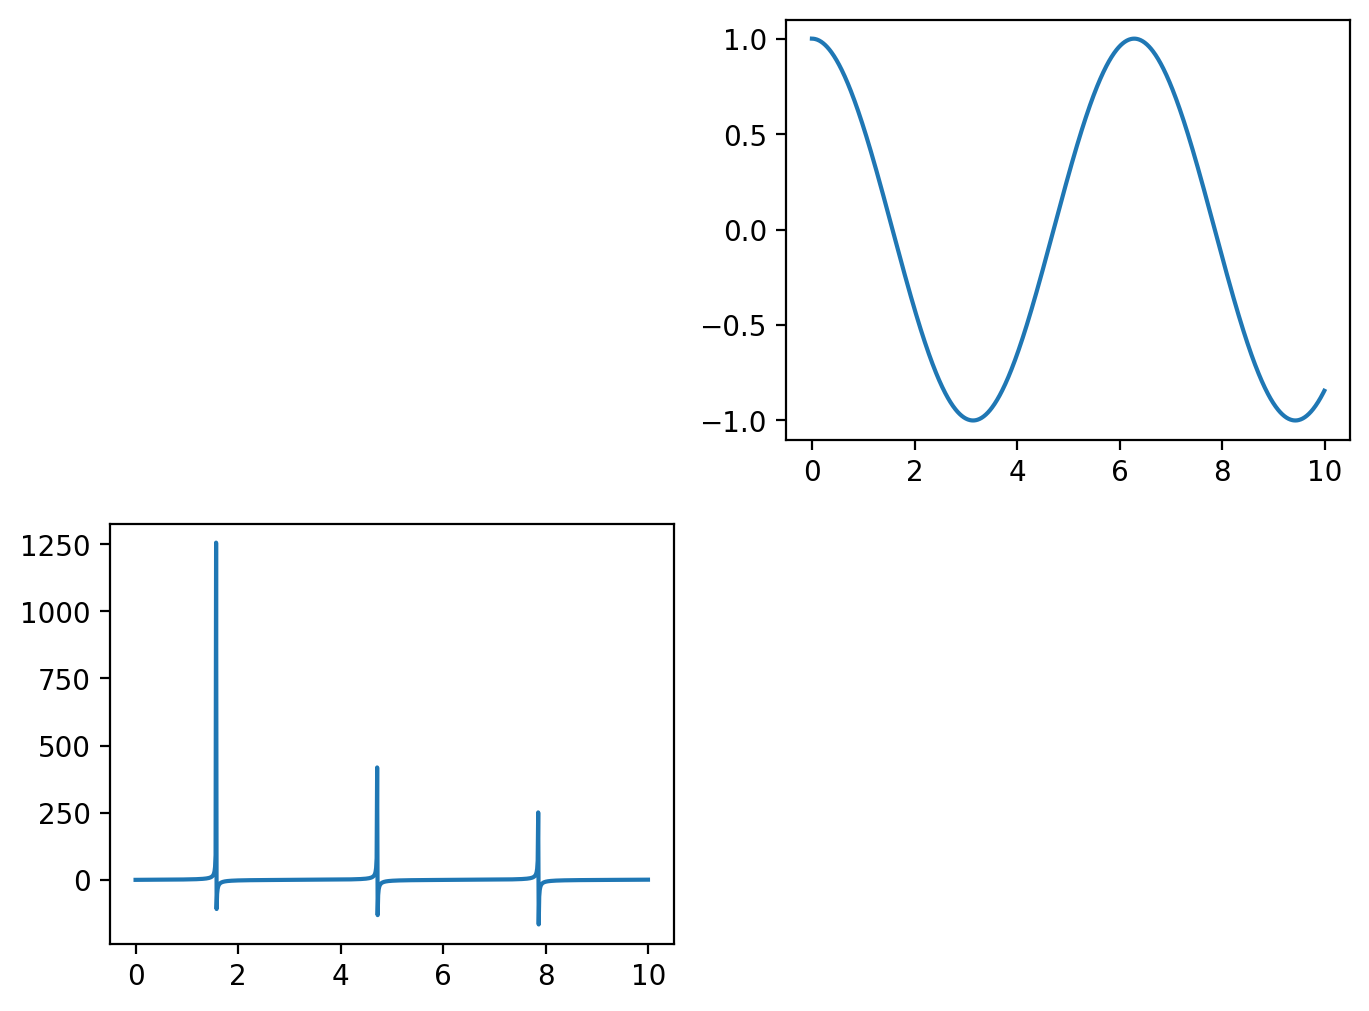

In [21]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 3); plt.plot(x, np.tan(x))
plt.subplots(2, 2, 4); plt.plot(x, np.tan(x))

### 2) subplots()함수로 추가

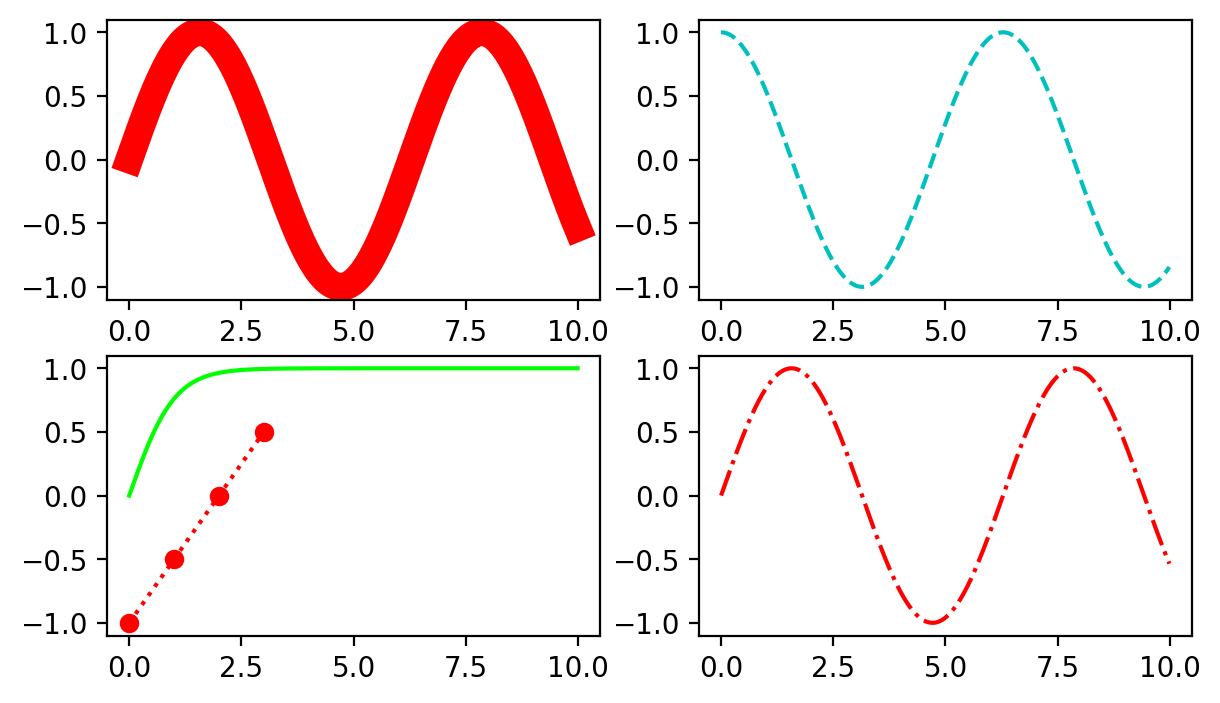

In [28]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), color='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--')
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5], 'ro:')
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show()

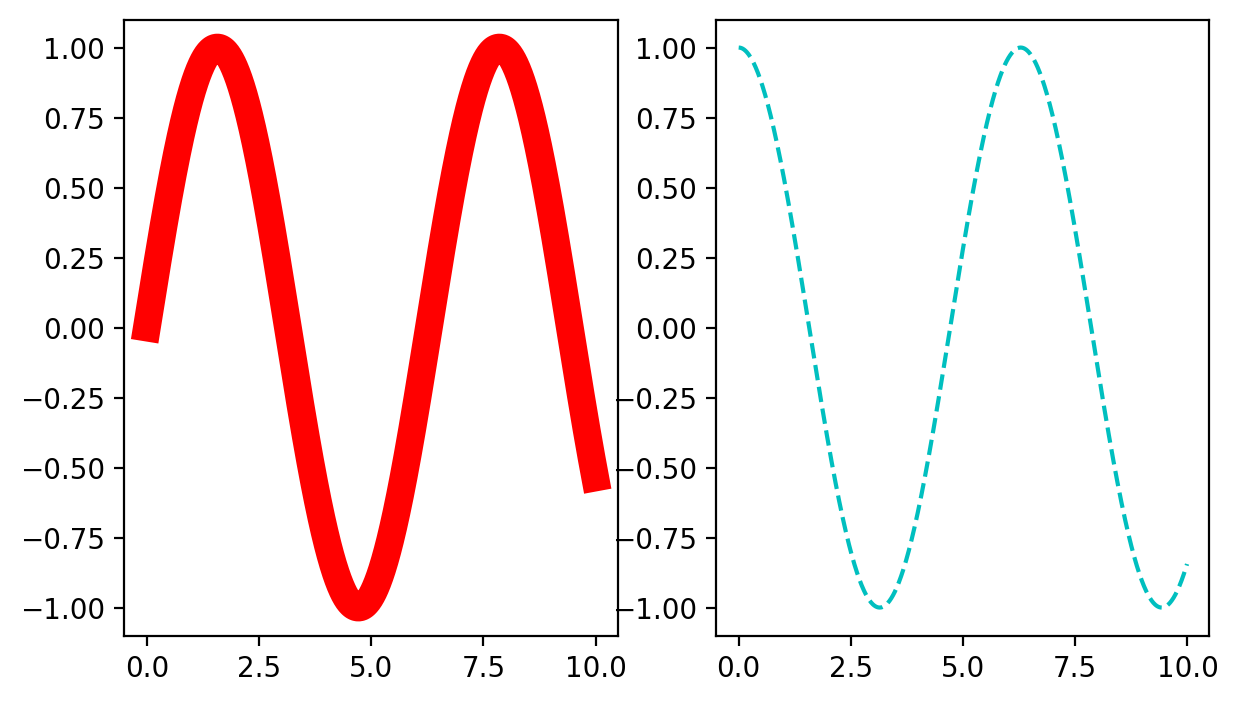

In [29]:
# 2행 2열 서브 플롯
fig, axes = plt.subplots(ncols=2, figsize=(7,4))
axes[0].plot(x, np.sin(x), color='r', linewidth=10)
axes[1].plot(x, np.cos(x), 'c--') 

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, figsize, title, xlim, ylim)
   * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density,...
   * xlim, ylim : list/tuple

In [30]:
from seaborn import load_dataset
iris=load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa


<Axes: xlabel='petal_length'>

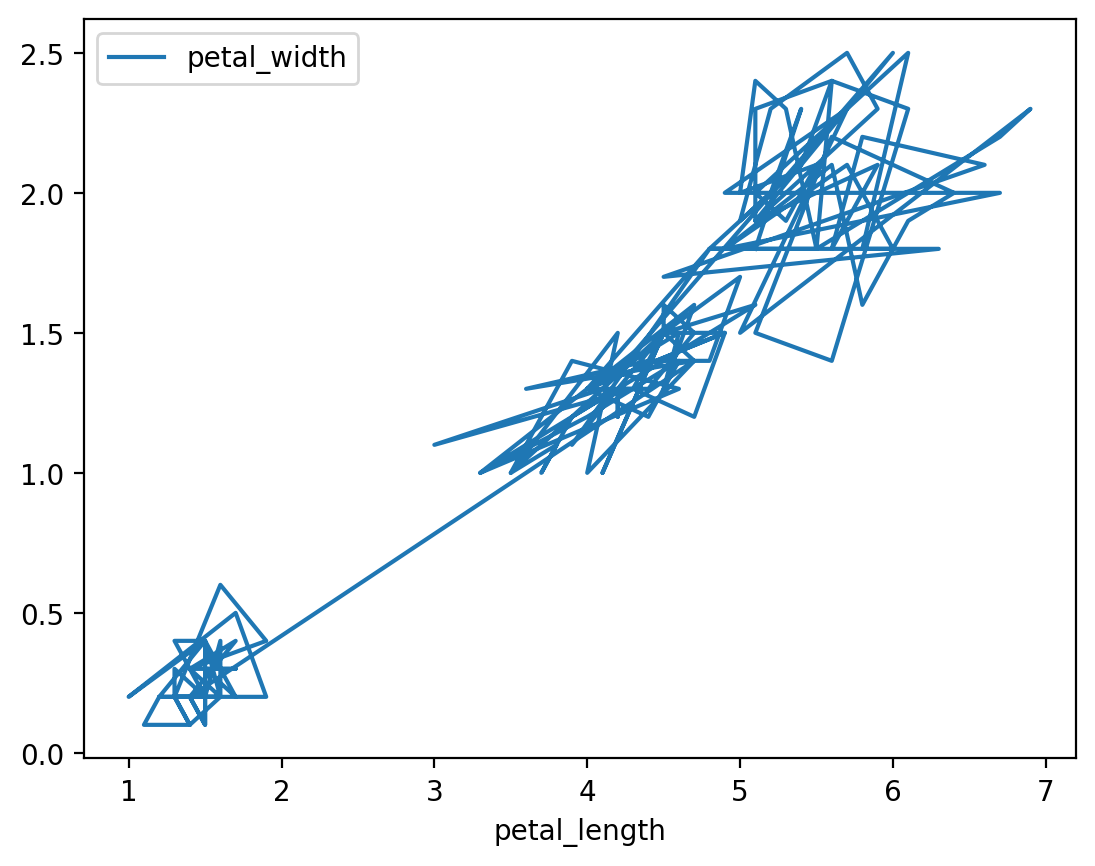

In [31]:
iris.plot(x='petal_length', y='petal_width')

In [ ]:
범례사용용

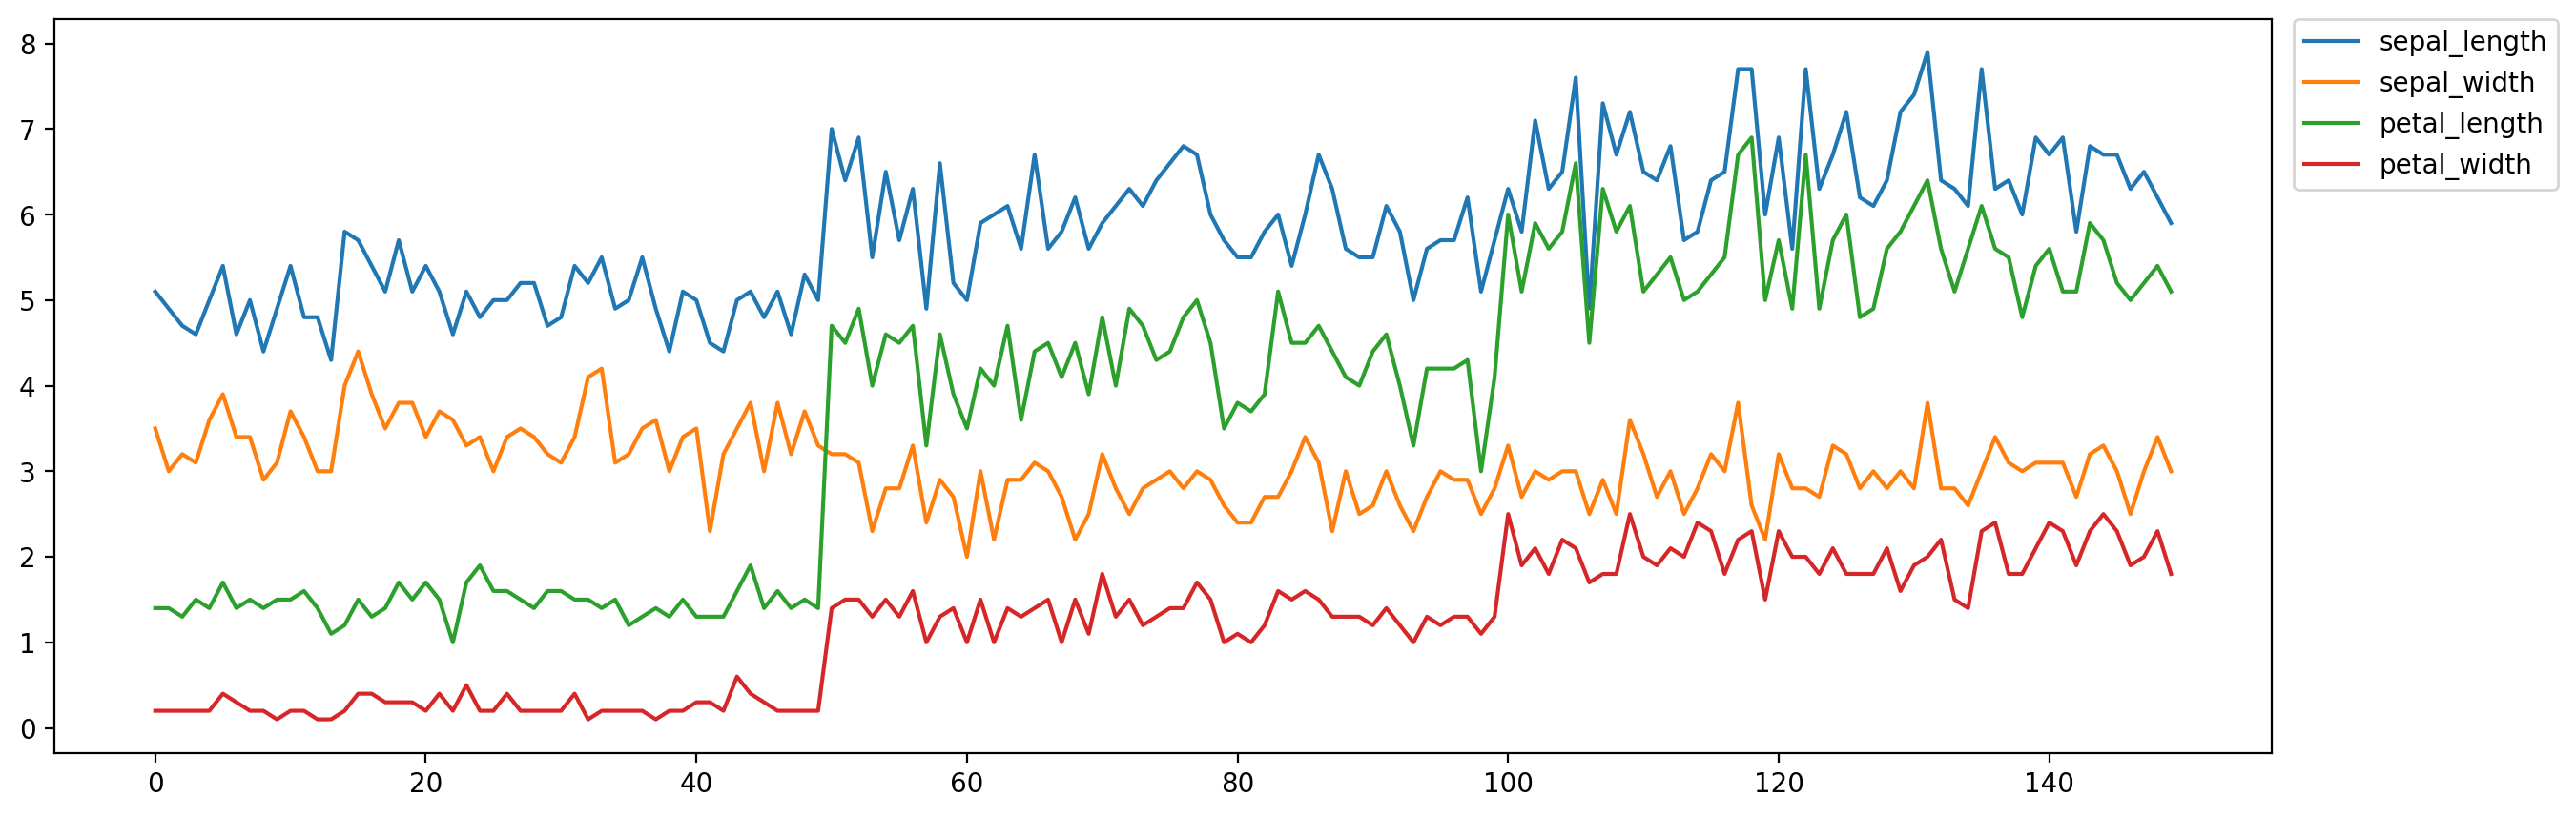

In [38]:
iris.plot(kind='line', figsize=(15,5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('data/ch12_iris.jpg')

In [39]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


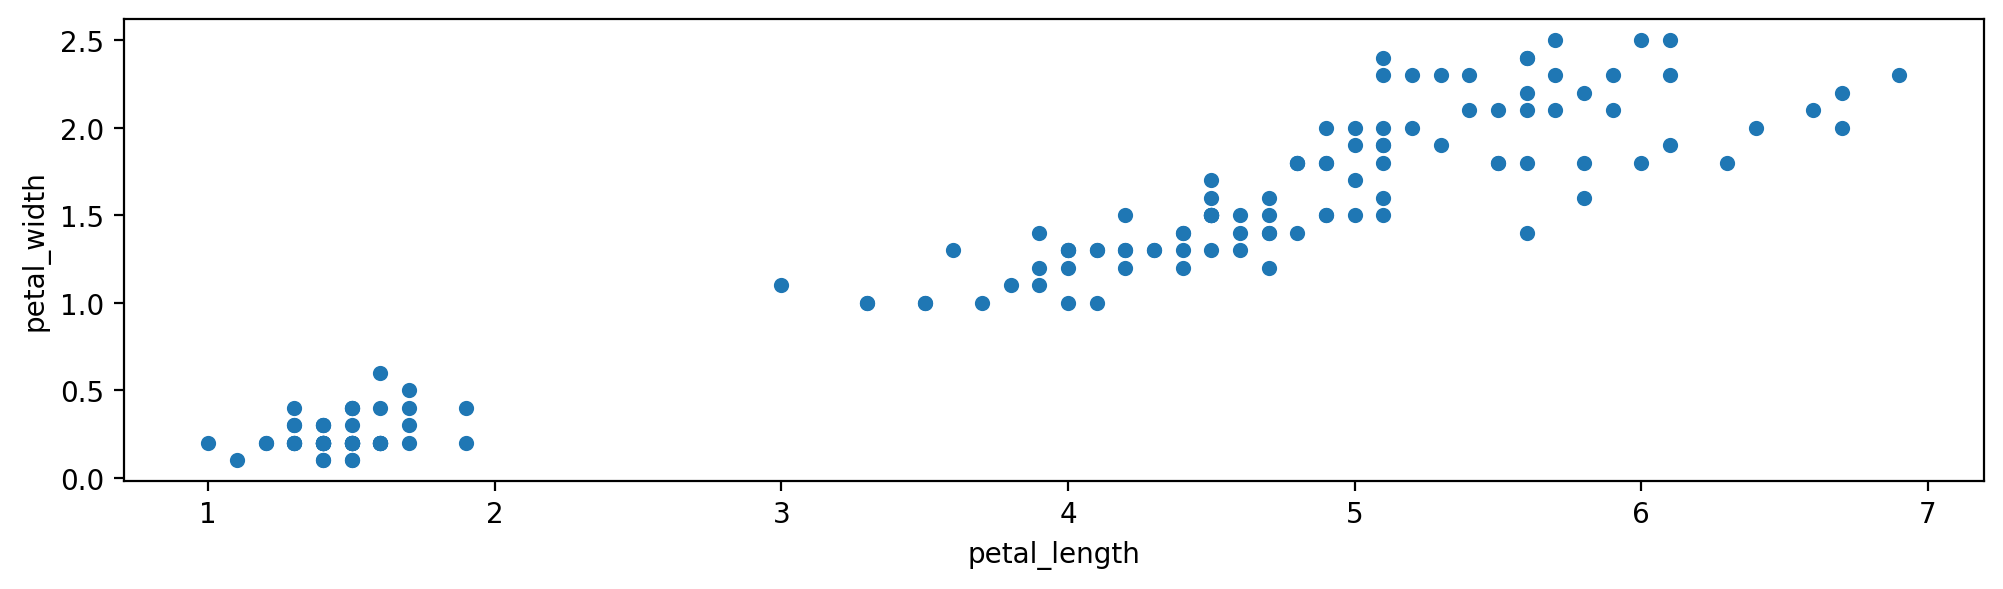

In [41]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

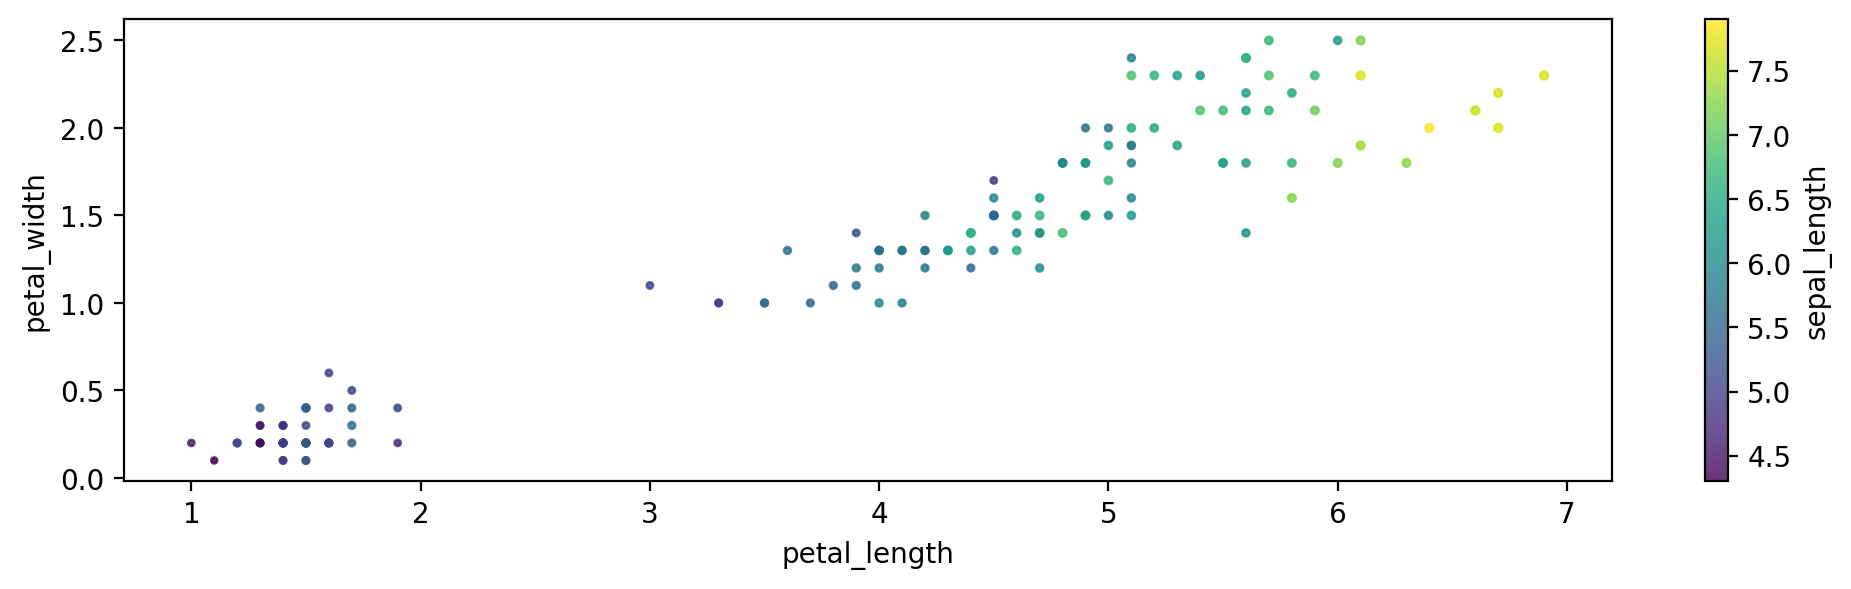

In [43]:
iris.plot(kind='scatter',
         x='petal_length', y='petal_width',figsize=(12,3),
          s='sepal_length', # size
          c='sepal_length',  # color
          alpha=0.8) # 0<=투명도<=1
plt.show()


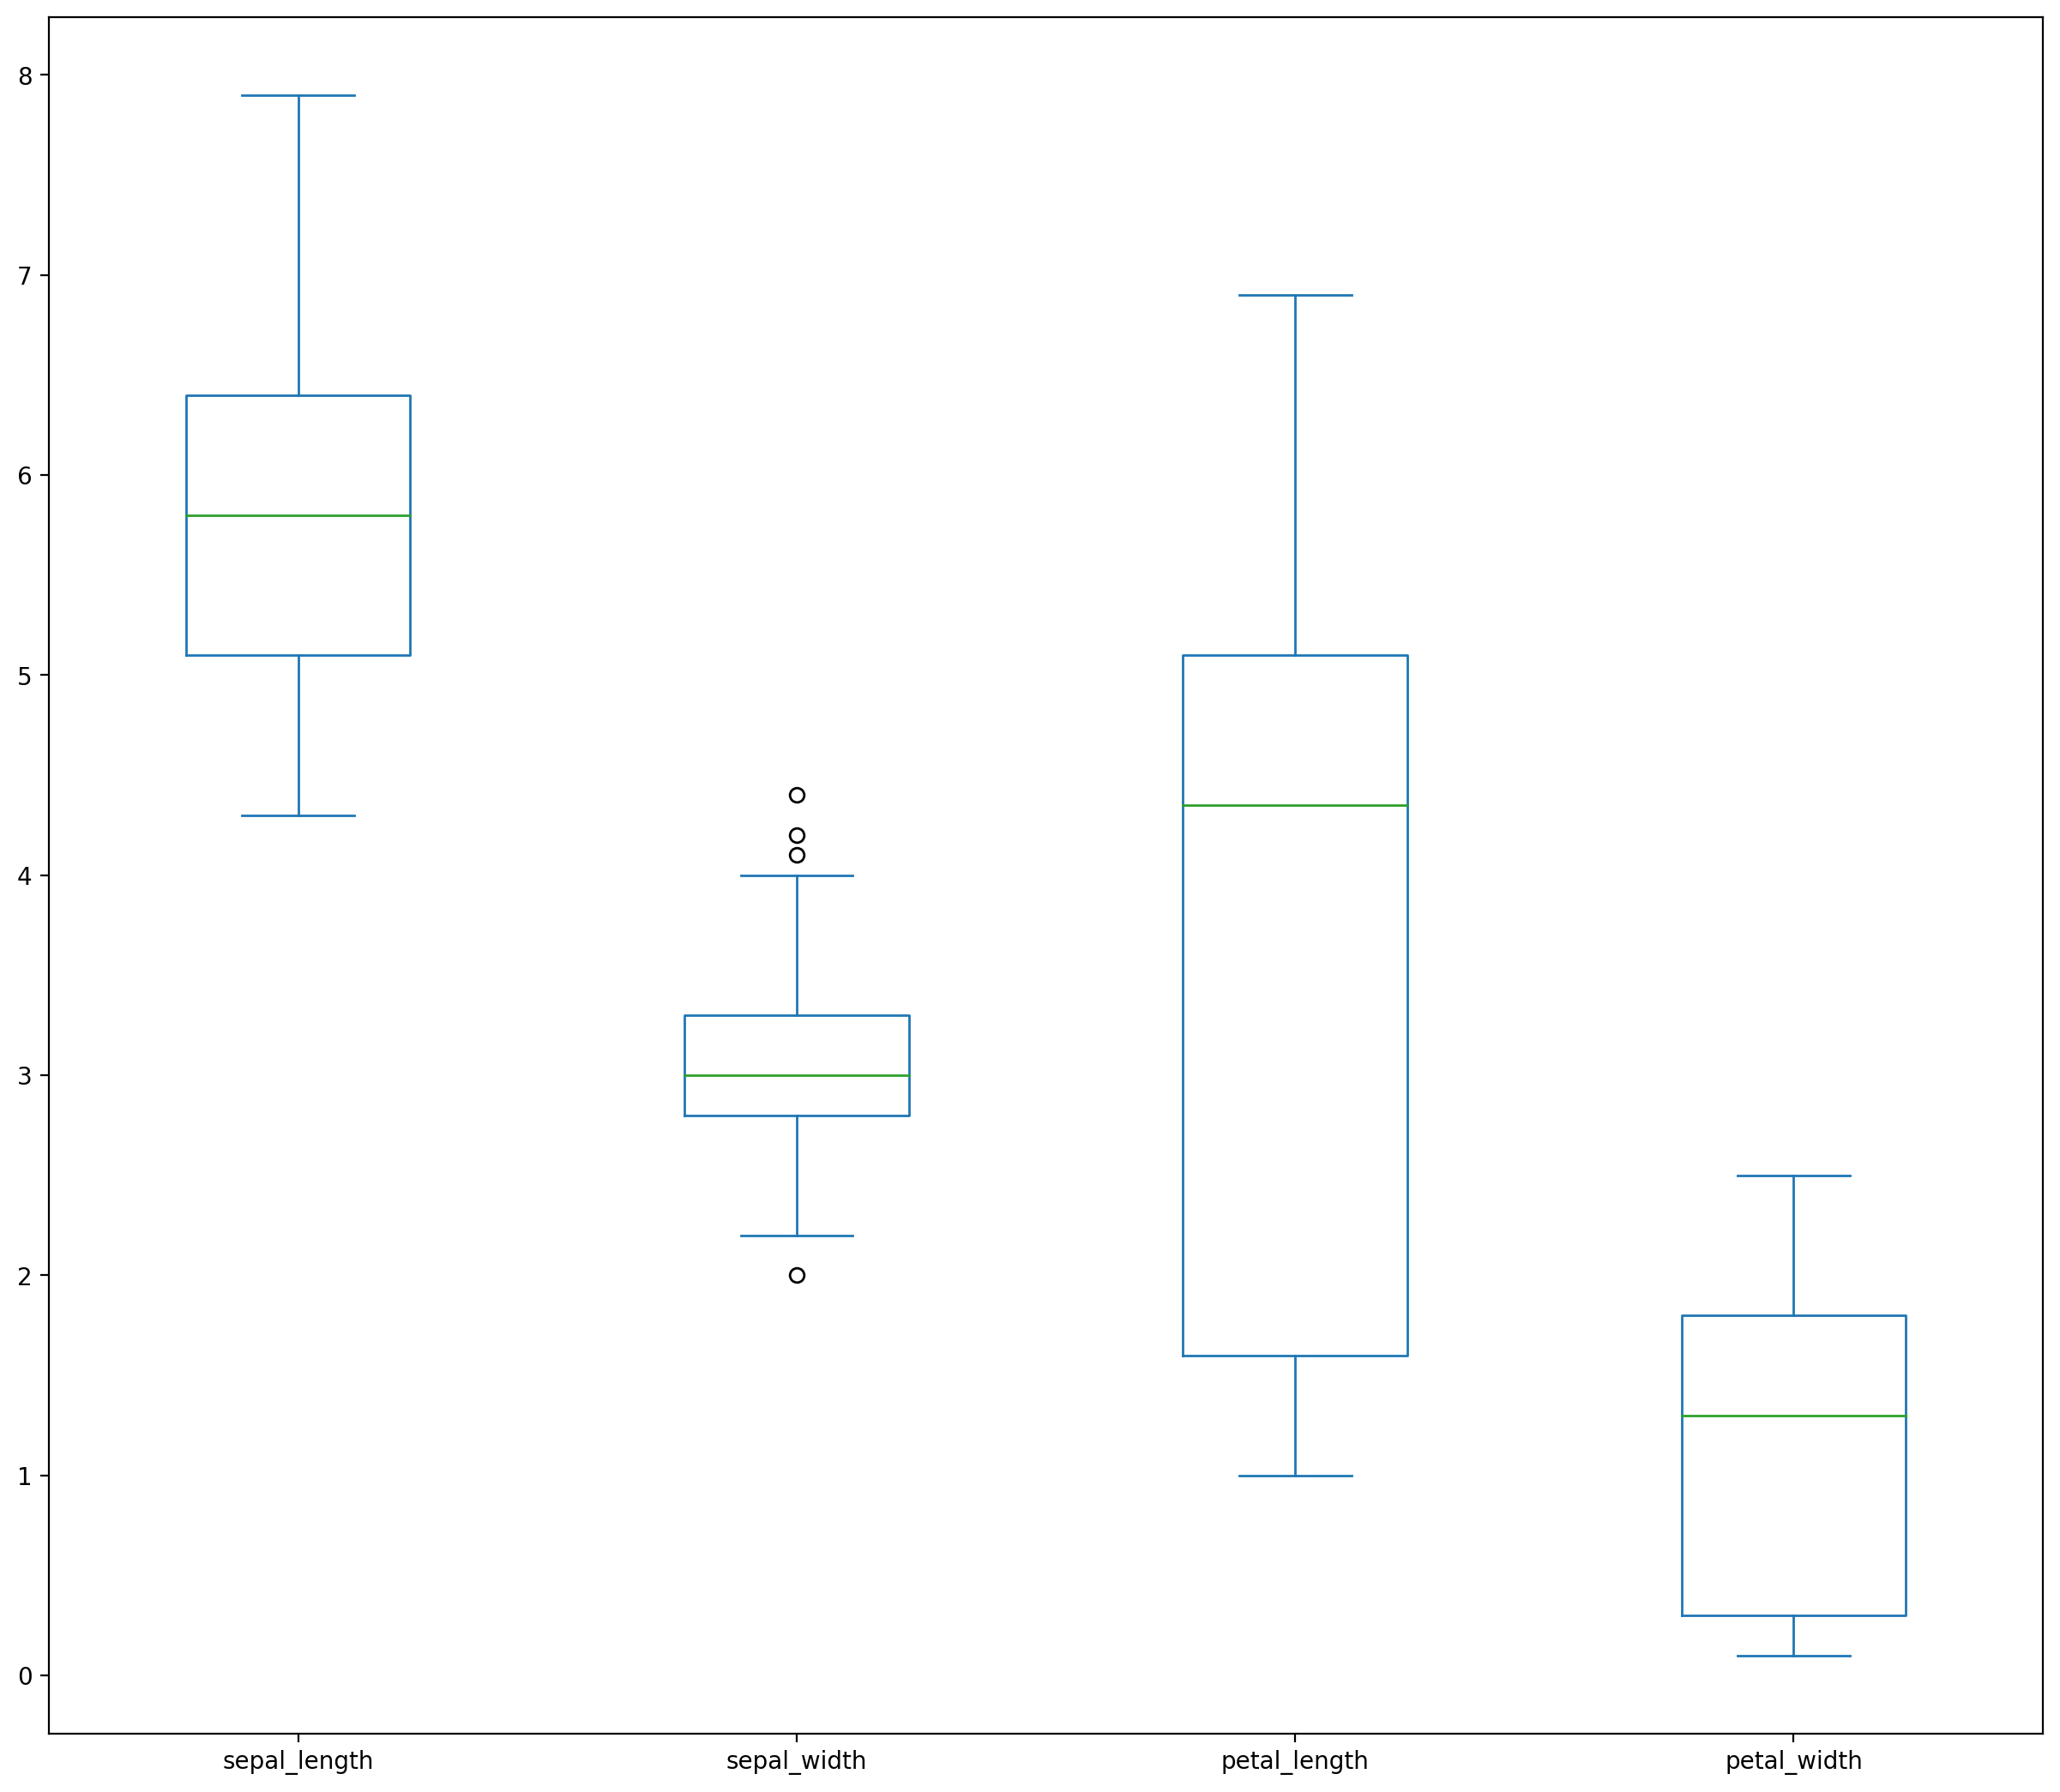

In [46]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box',figsize=(15,13))
plt.show()

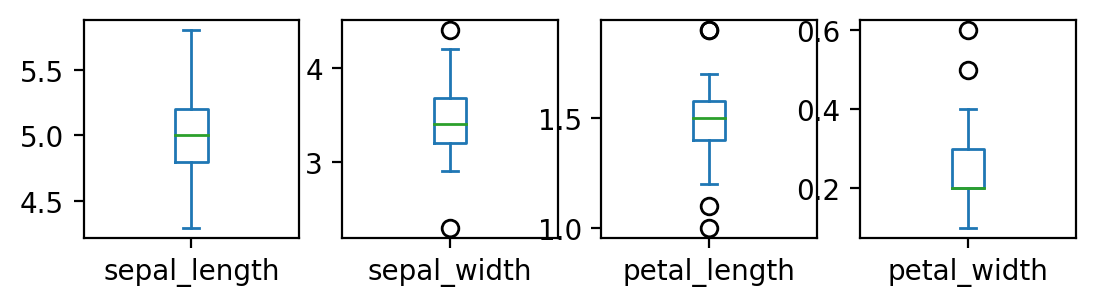

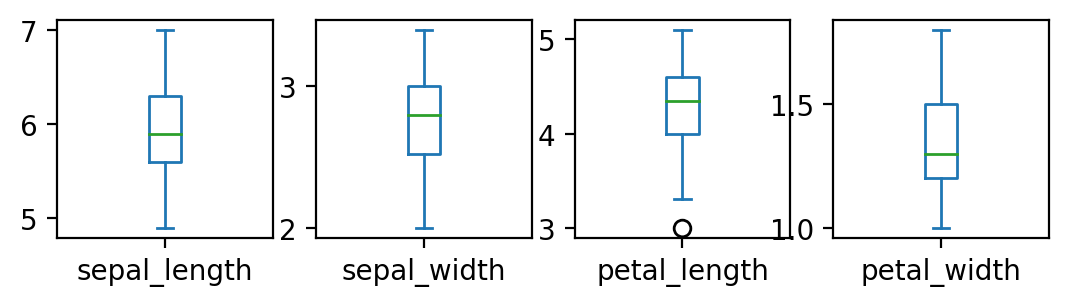

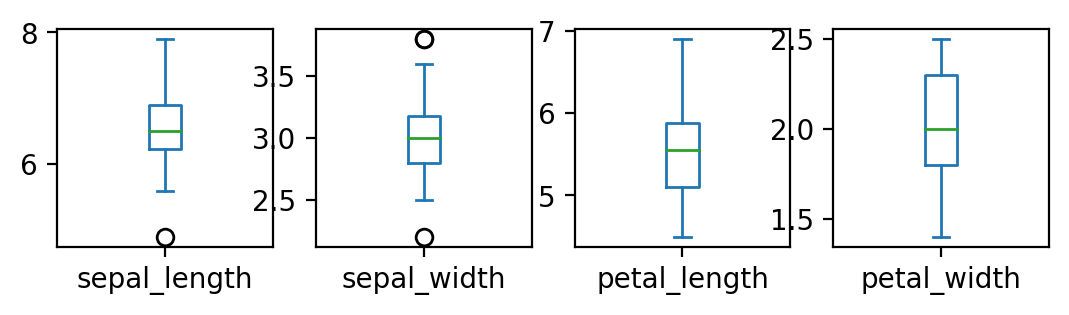

In [51]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                             subplots=True,
                            layout=(3,4),
                            sharex=True) # x 축 공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot함수들 : 
- plt.scatter() : 산점도

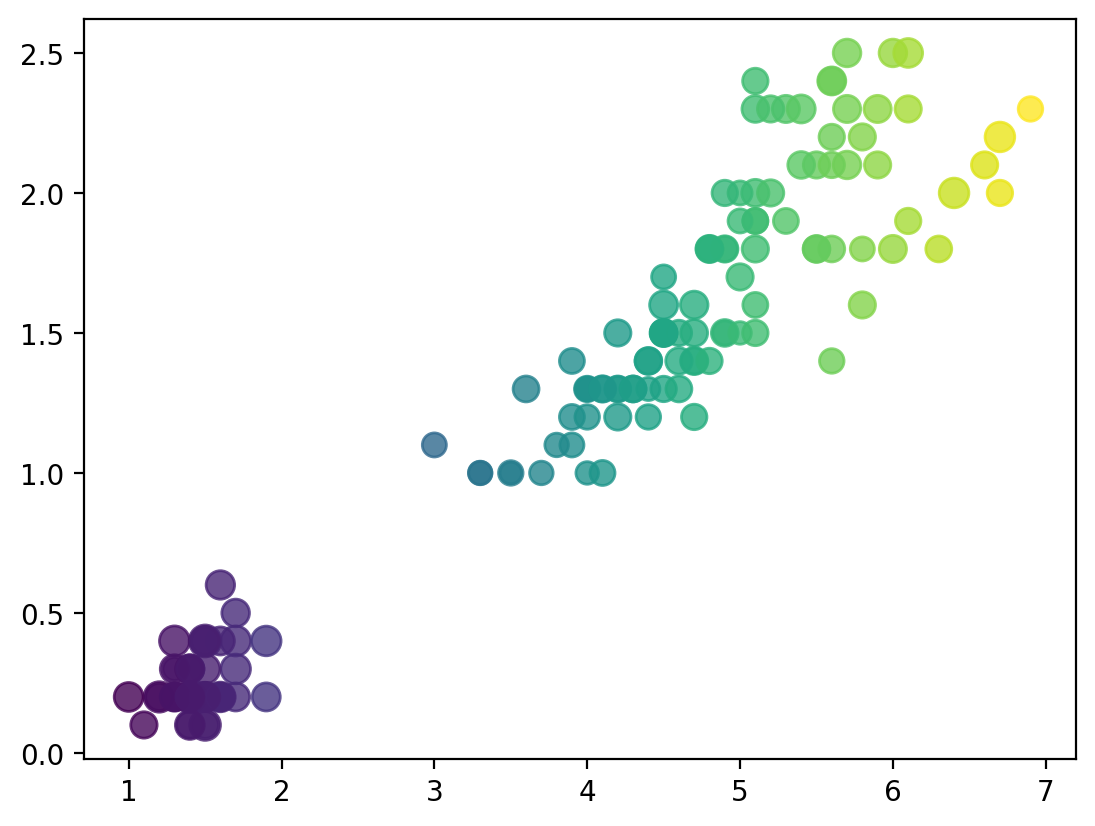

In [55]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.sepal_width*30,    # size
           c=iris.petal_length*20,   # color
           alpha=.8)

### 2)boxplot(단점:분포를 몰라), vilionplot()

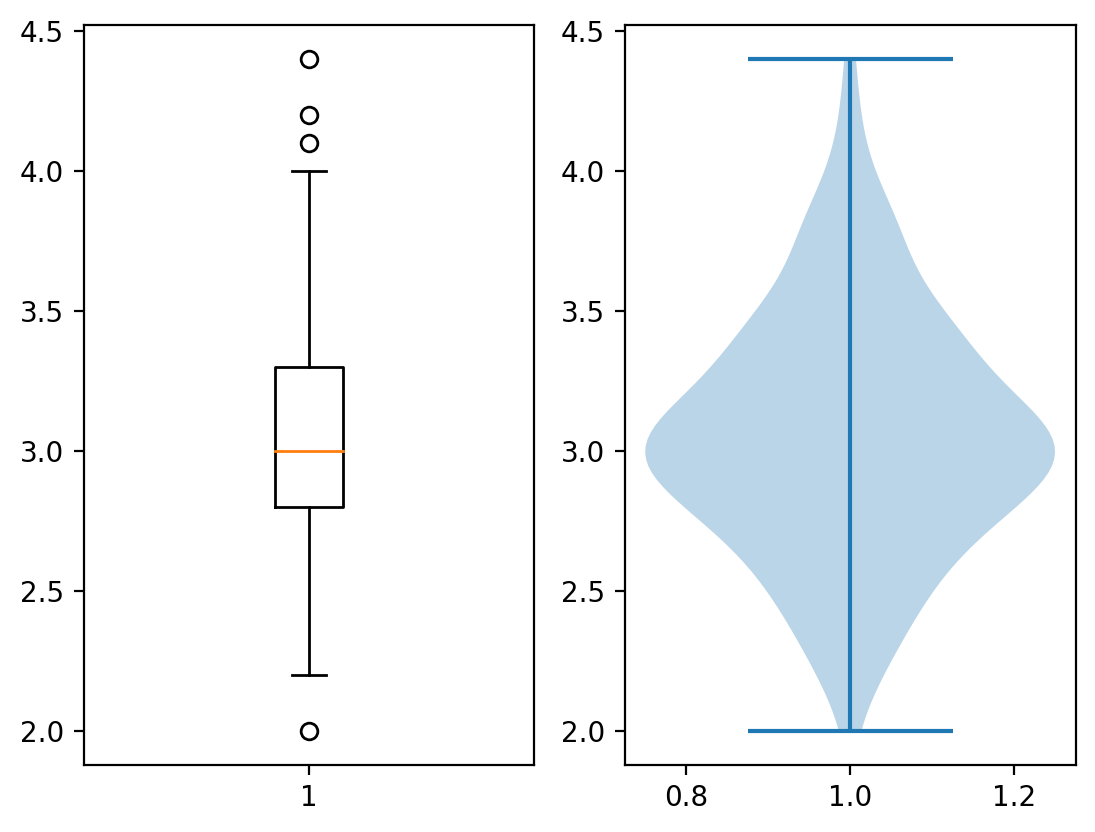

In [56]:

fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3)bar(),barh(),axvline(수직선), axhline(수평선)

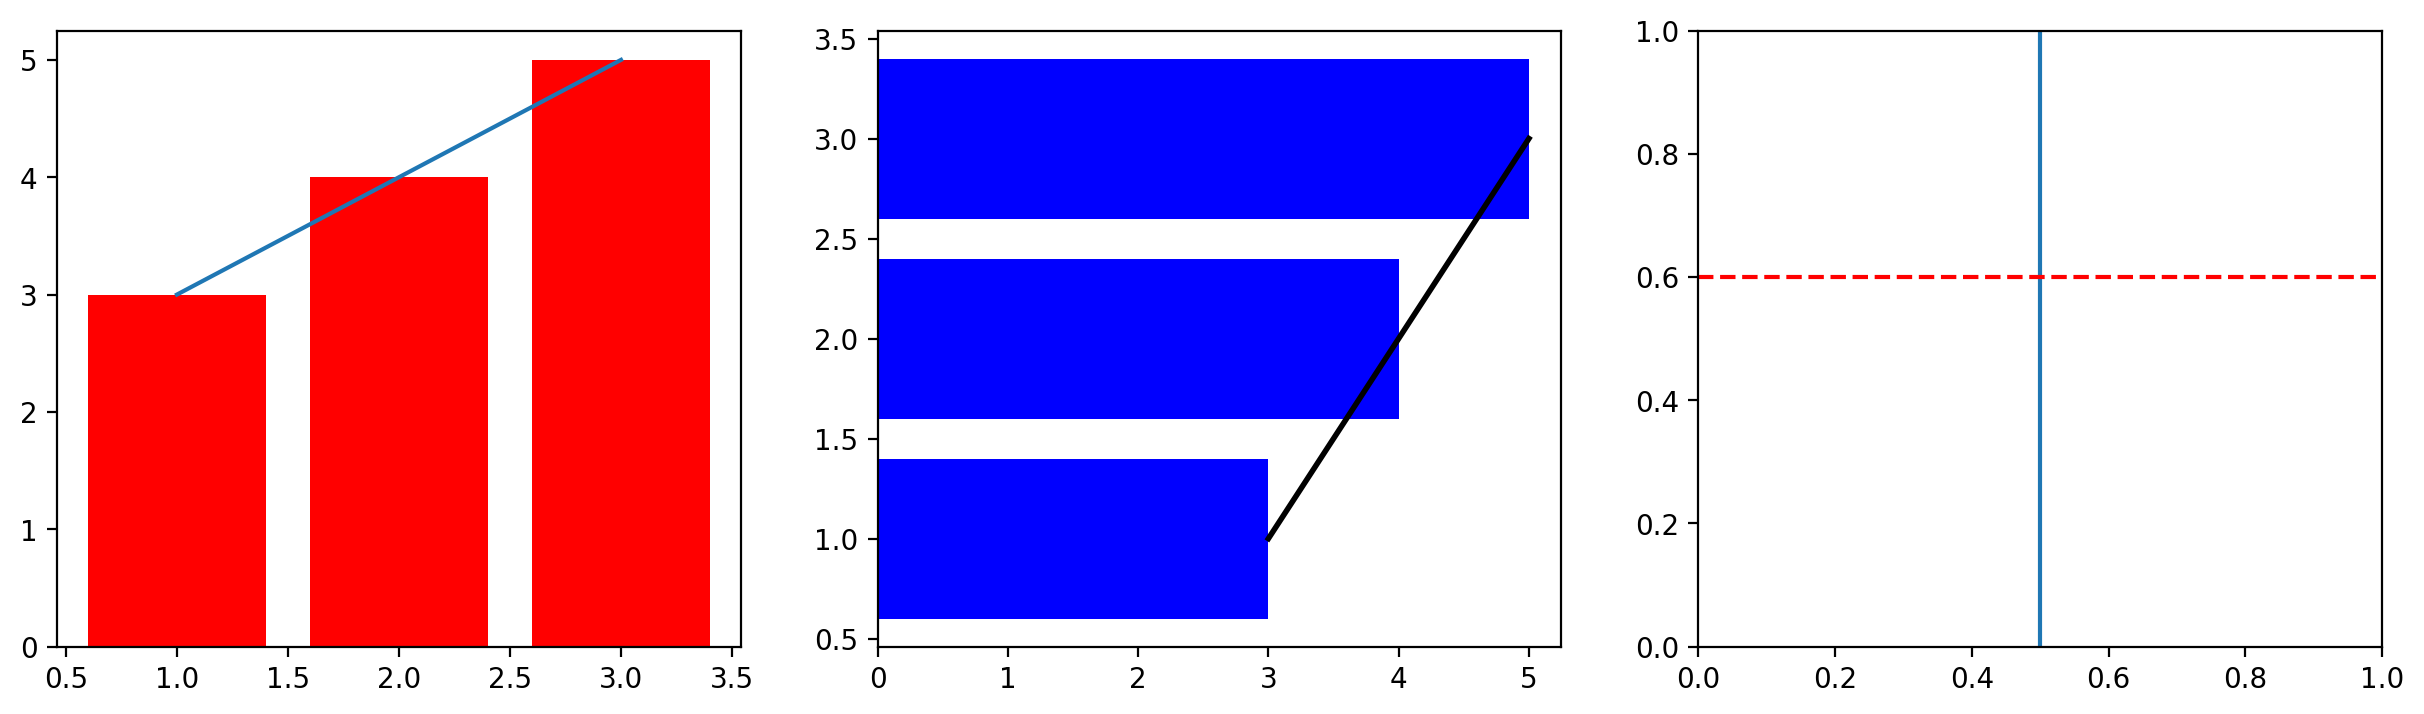

In [65]:
x=[1,2,3]
y=[3,4,5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
axes[0].bar(x,y,color='r')
axes[0].plot(x,y)
axes[1].barh(x,y,color='b')
axes[1].plot(y,x, 'k', linewidth=2)
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')

## 4) hist(도수분포표;histogram)

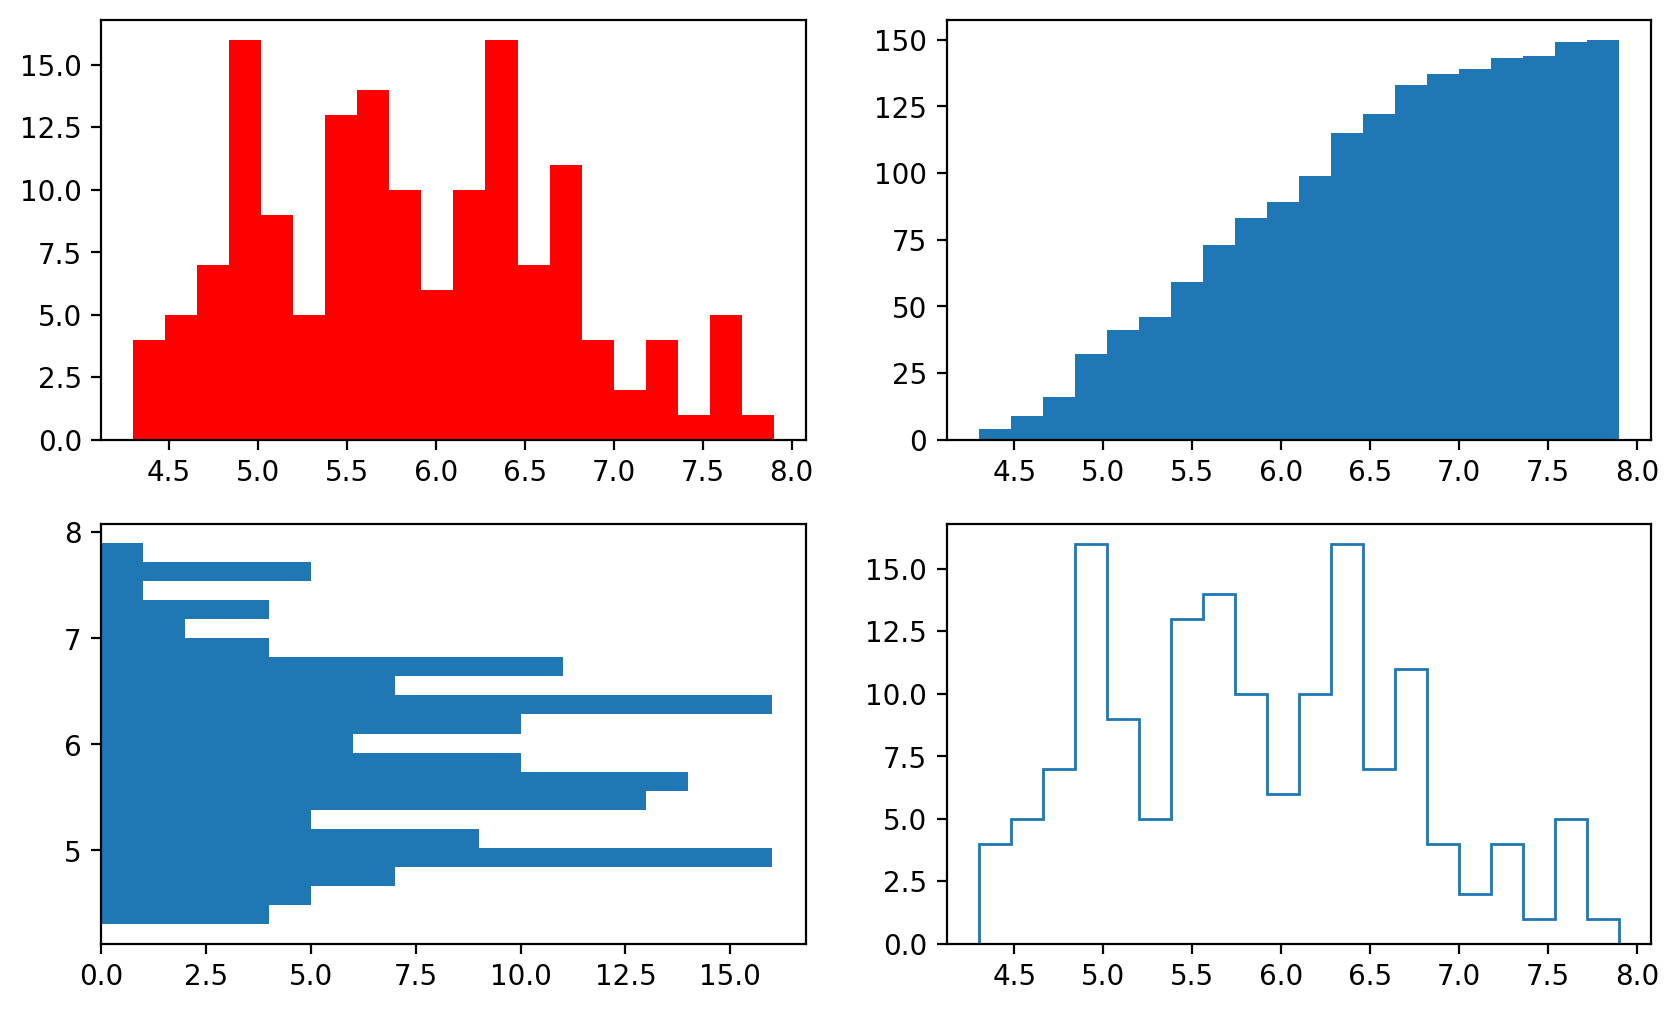

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) #누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step') # 수평히스토그램
plt.show()


## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker..(plot의 매개변수로 지정)
### 2) text(),annoate()

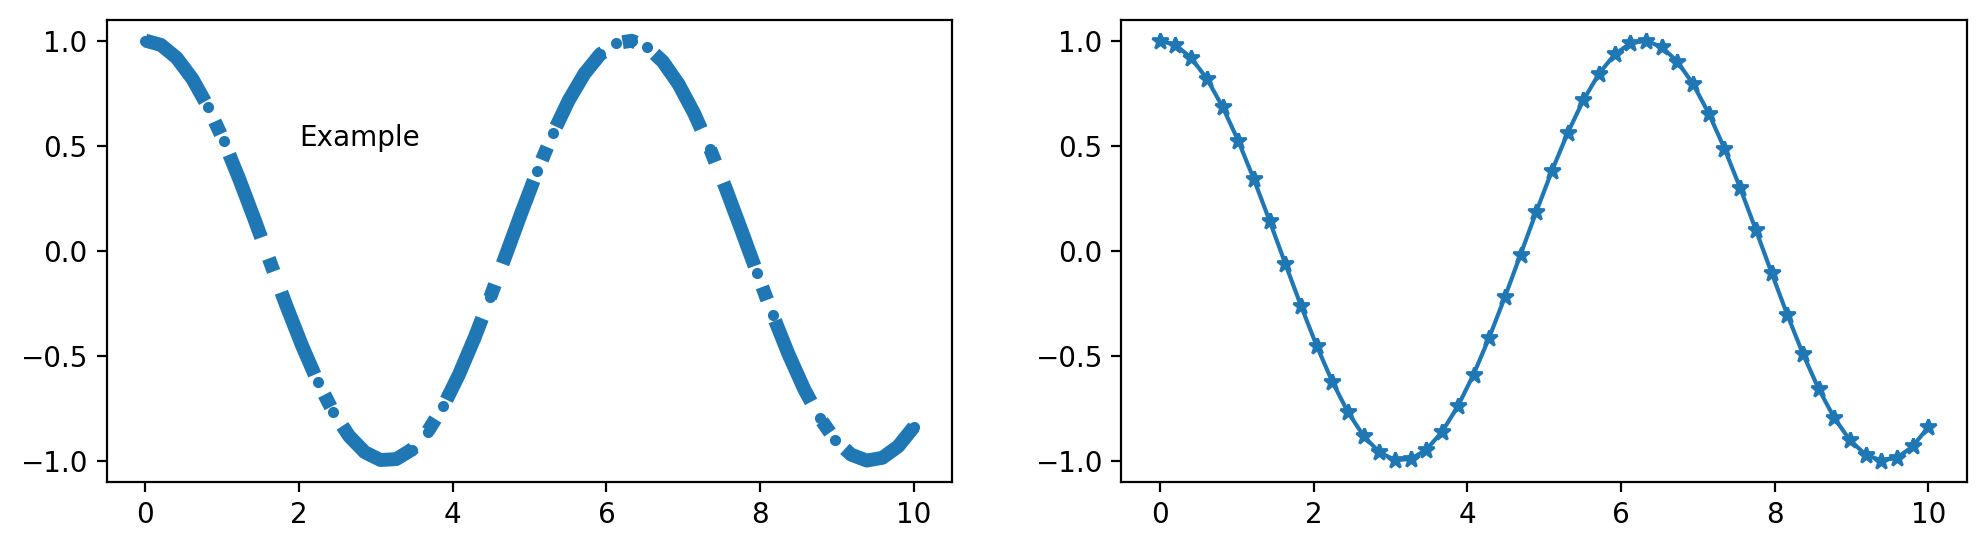

In [81]:
x = np.linspace(0, 10, 50)
y = np.cos(x)
fig, axes = plt.subplots(1,2,figsize=(12,3))
axes[0].plot(x,y, marker='.', linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, 'Example')
axes[1].plot(x, y, marker='*')
plt.show()